# 문제 정의

제공 받은 Dataset은 age, anaemia, high blood pressure, diabetes 등의 병원데이터라고 추측되는 데이터이고 DEATH_EVENT는 해당 환자의 사후관리 기간 중 사망한 경우를 나타냅니다.

라이브러리 임포트

In [2]:
# Libraies for reading and handling the data
import numpy as np
import pandas as pd
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression     # LR
from sklearn.tree import DecisionTreeClassifier         # Decision Tree
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn import svm                                 # SVM
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Boosting
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # QDA
from sklearn.neural_network import MLPClassifier        # NN
from sklearn.ensemble import RandomForestClassifier     # RF
from sklearn.ensemble import BaggingClassifier          # BAGGING

# Library for Analysing the ML model
from sklearn import metrics

한글 깨짐 방지

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


데이터 준비하기

In [5]:
# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('data.csv', header=None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    object
 2   2       300 non-null    object
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
dtypes: object(13)
memory usage: 30.6+ KB


In [7]:
# 열 이름 지정
df.columns = ['age','anamia','creatinine_phosphokinase','diabetes','ejection_fraction',
              'high_blood_pressure','platelets','serum_creatinine','serum_sodium',
              'sex','smoking','time','DEATH_EVENT']

In [8]:
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1


데이터 탐색 및 데이터 전처리

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       300 non-null    object
 1   anamia                    300 non-null    object
 2   creatinine_phosphokinase  300 non-null    object
 3   diabetes                  300 non-null    object
 4   ejection_fraction         300 non-null    object
 5   high_blood_pressure       300 non-null    object
 6   platelets                 300 non-null    object
 7   serum_creatinine          300 non-null    object
 8   serum_sodium              300 non-null    object
 9   sex                       300 non-null    object
 10  smoking                   300 non-null    object
 11  time                      300 non-null    object
 12  DEATH_EVENT               300 non-null    object
dtypes: object(13)
memory usage: 30.6+ KB


In [10]:
# column 추가로 중복된 첫 번째행 삭제
df= df.drop(0,0)
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [11]:
# age 열의 자료형 변경 (문자열 -> 숫자)
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', '60.667', '73', '77',
       '78', '54', '47', '56'], dtype=object)

In [12]:
# 60.667를 np.nan으로 변경
df['age'].replace('60.667',np.nan,inplace=True)
df.info

<bound method DataFrame.info of     age anamia creatinine_phosphokinase diabetes  ... sex smoking time DEATH_EVENT
1    75      0                      582        0  ...   1       0    4           1
2    55      0                     7861        0  ...   1       0    6           1
3    65      0                      146        0  ...   1       1    7           1
4    50      1                      111        0  ...   1       0    7           1
5    65      1                      160        1  ...   0       0    8           1
..   ..    ...                      ...      ...  ...  ..     ...  ...         ...
295  62      0                       61        1  ...   1       1  270           0
296  55      0                     1820        0  ...   0       0  271           0
297  45      0                     2060        1  ...   0       0  278           0
298  45      0                     2413        0  ...   1       1  280           0
299  50      0                      196        0  ...  

In [13]:
# nan 확인
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', nan, '73', '77', '78',
       '54', '47', '56'], dtype=object)

In [14]:
# 데이터안 nan값 60으로 변경
df=df.fillna(60)

In [15]:
# 변경 사항 확인
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', 60, '73', '77', '78',
       '54', '47', '56'], dtype=object)

In [16]:
# 열들의 자료형 변경 (문자열 -> 숫자)
df['age']=df['age'].astype('int')

df['creatinine_phosphokinase']=df['creatinine_phosphokinase'].astype('int')

df['ejection_fraction']=df['ejection_fraction'].astype('int')

df['platelets']=df['platelets'].astype('float')

df['serum_creatinine']=df['serum_creatinine'].astype('float')

df['serum_sodium']=df['serum_sodium'].astype('int')

df['time']=df['time'].astype('int')

df['DEATH_EVENT']=df['DEATH_EVENT'].astype('int')

In [17]:
# 숫자 형태의 변수 -> 카테고리 형태로 변경
categorical_var=['anamia','diabetes','high_blood_pressure','sex','smoking']
df[categorical_var] = df[categorical_var].astype('category')

형변환 완료한 데이터 형식

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    int64   
 1   anamia                    299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(2), int64(6)
memory usage:

In [19]:
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


데이터 시각화

In [20]:
# 사망 여부 확인 (0:사망, 1: 생존)
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


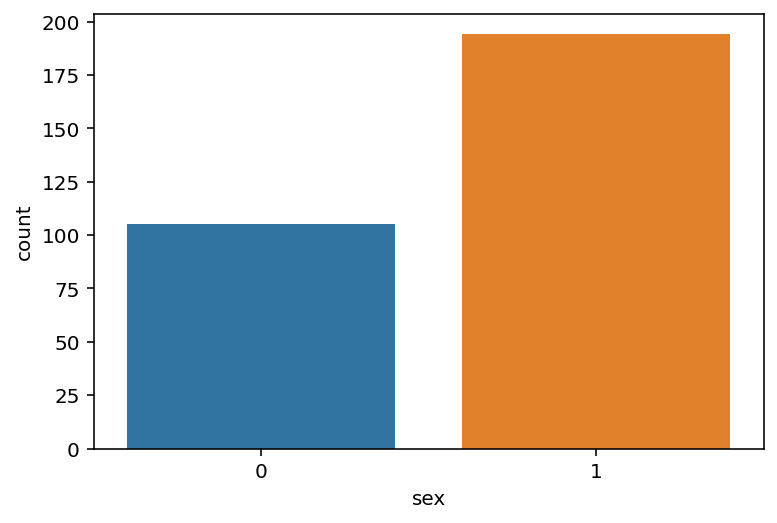

In [21]:
# 성별에 따른 환자의 수 (0: 여성, 1: 남성)
sns.countplot(df.sex)

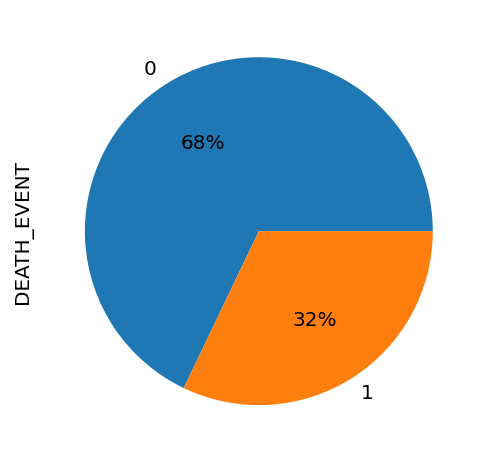

In [22]:
# 사망자-생존자 환자 비율 (0: 사망, 1: 생존)
df.DEATH_EVENT.value_counts().plot.pie(autopct = '%1.f%%')

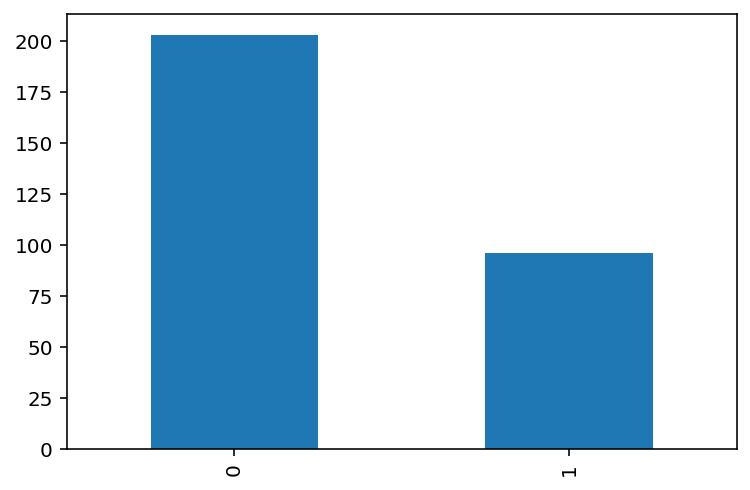

In [23]:
# 바 그래프 시각화
df.DEATH_EVENT.value_counts().plot.bar()

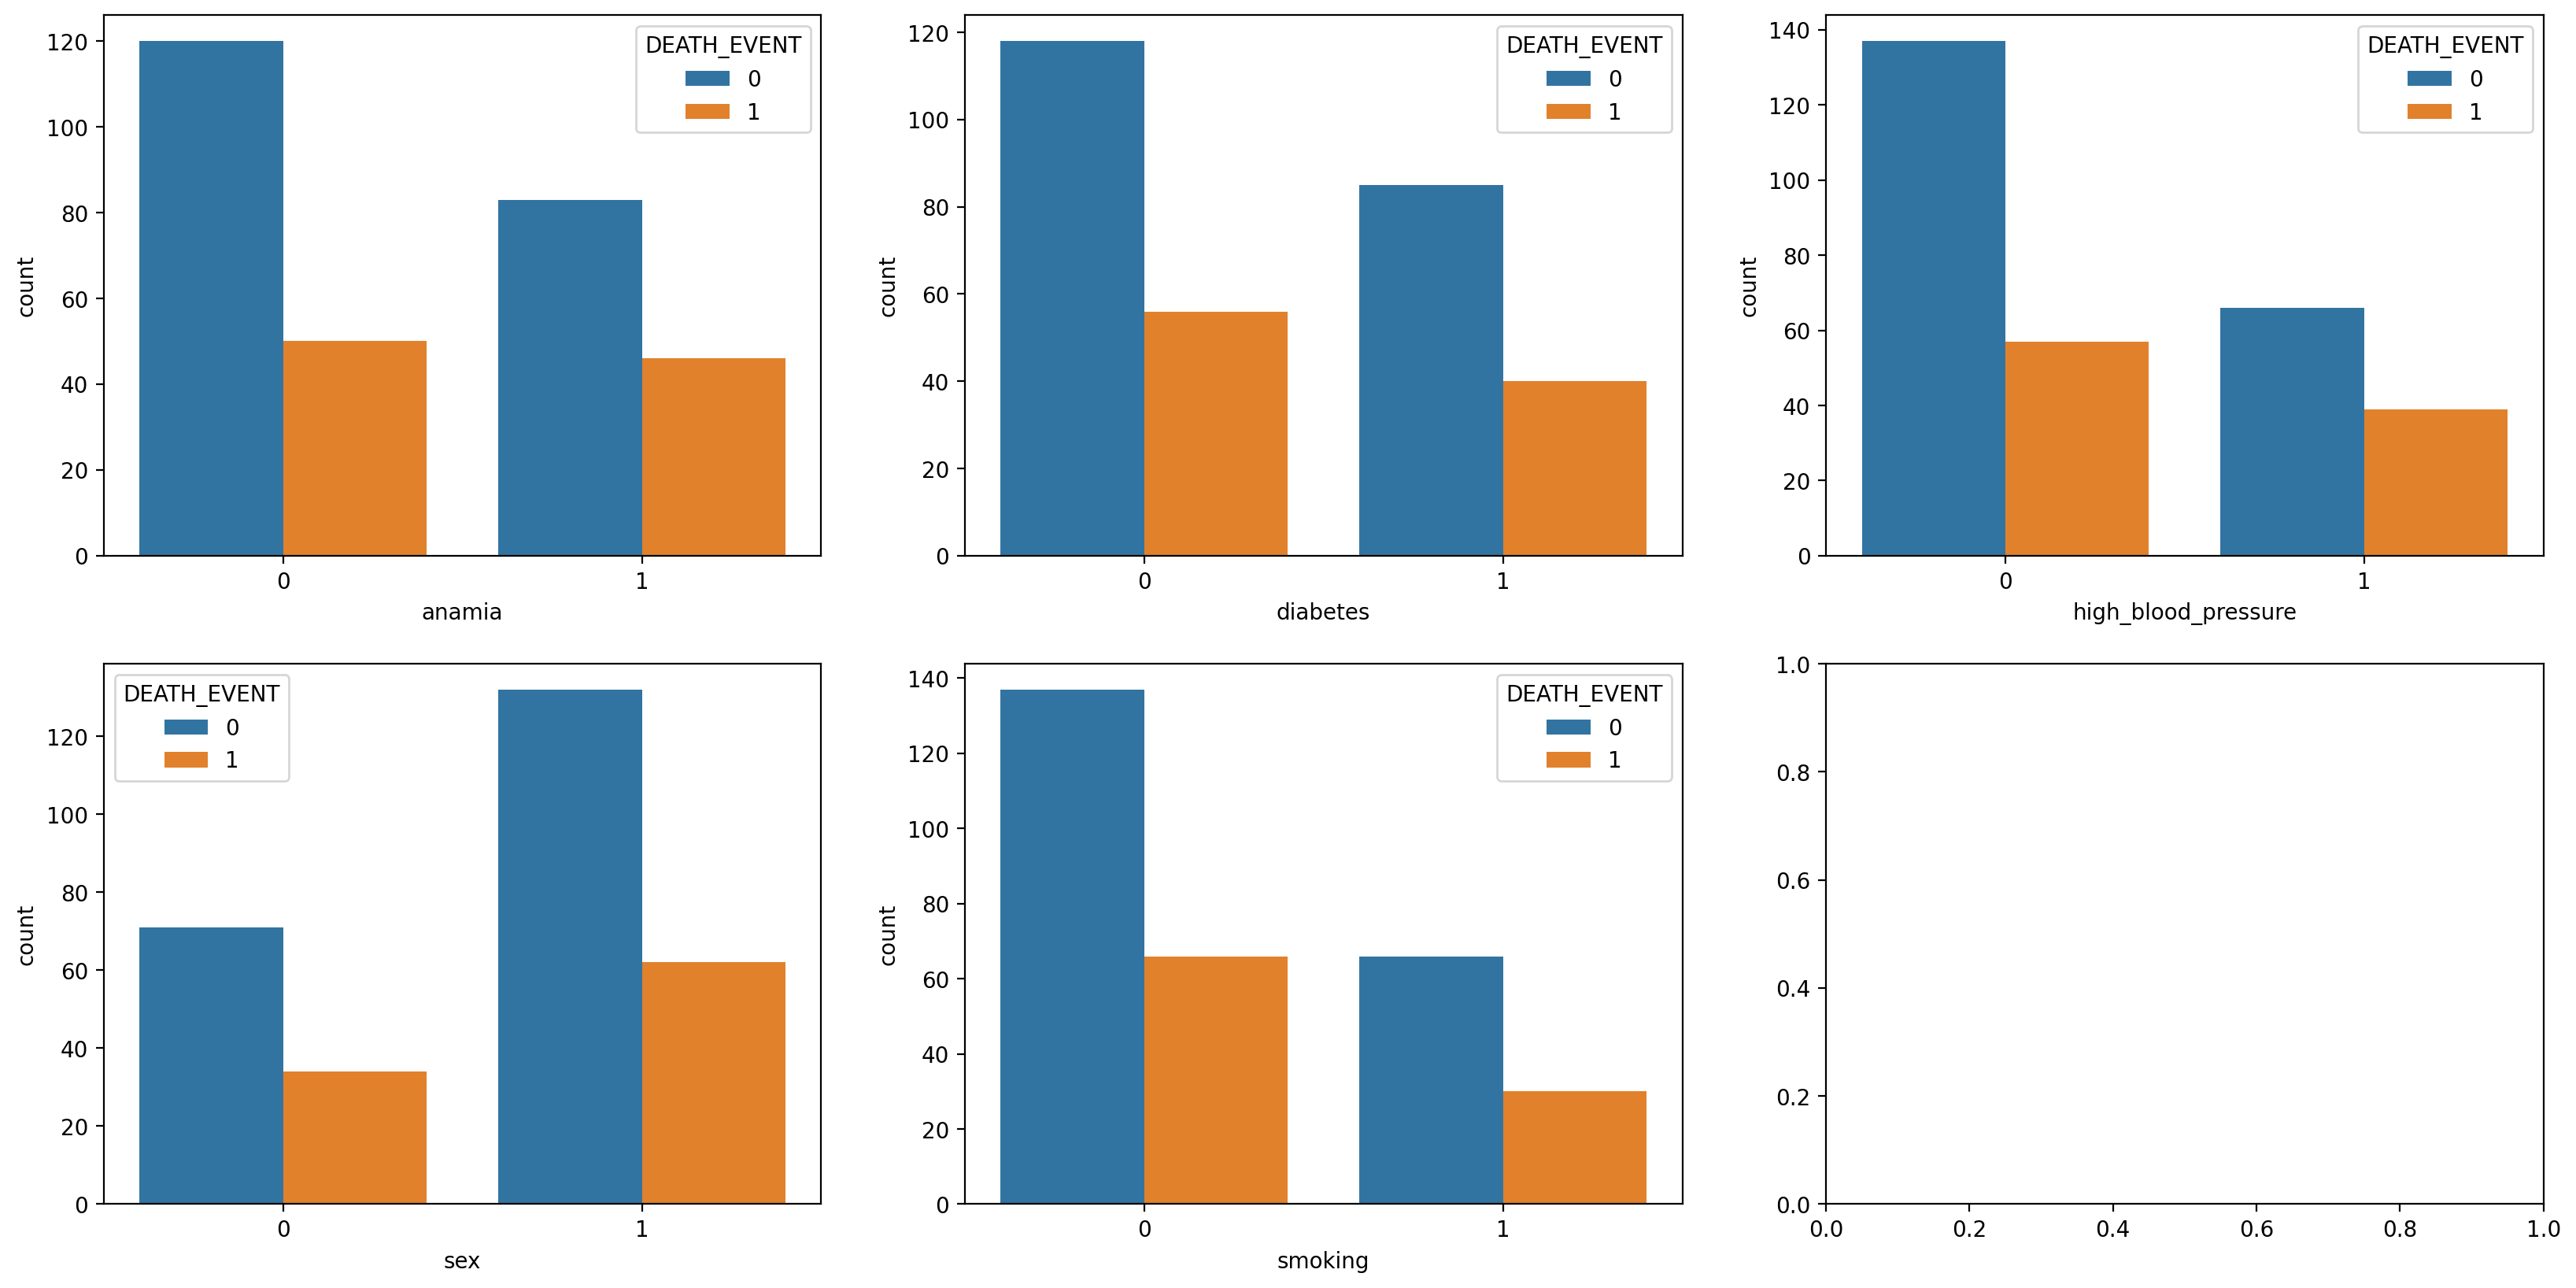

In [24]:
# 범주형으로 되어있는 컬럼에 대한 사망, 생존의 관계 확인
fig, ax = plt.subplots(2,3,figsize=(20,10), dpi=100) # 2행 3열

for axis, cat_var in zip(ax.ravel(), categorical_var) :
  sns.countplot(x=cat_var, data=df, hue='DEATH_EVENT', ax=axis)

In [25]:
# 수치형으로 되어 있는 컬럼 -> 이상치
numeric_var = [i for i in df.columns if i not in categorical_var][:-1]

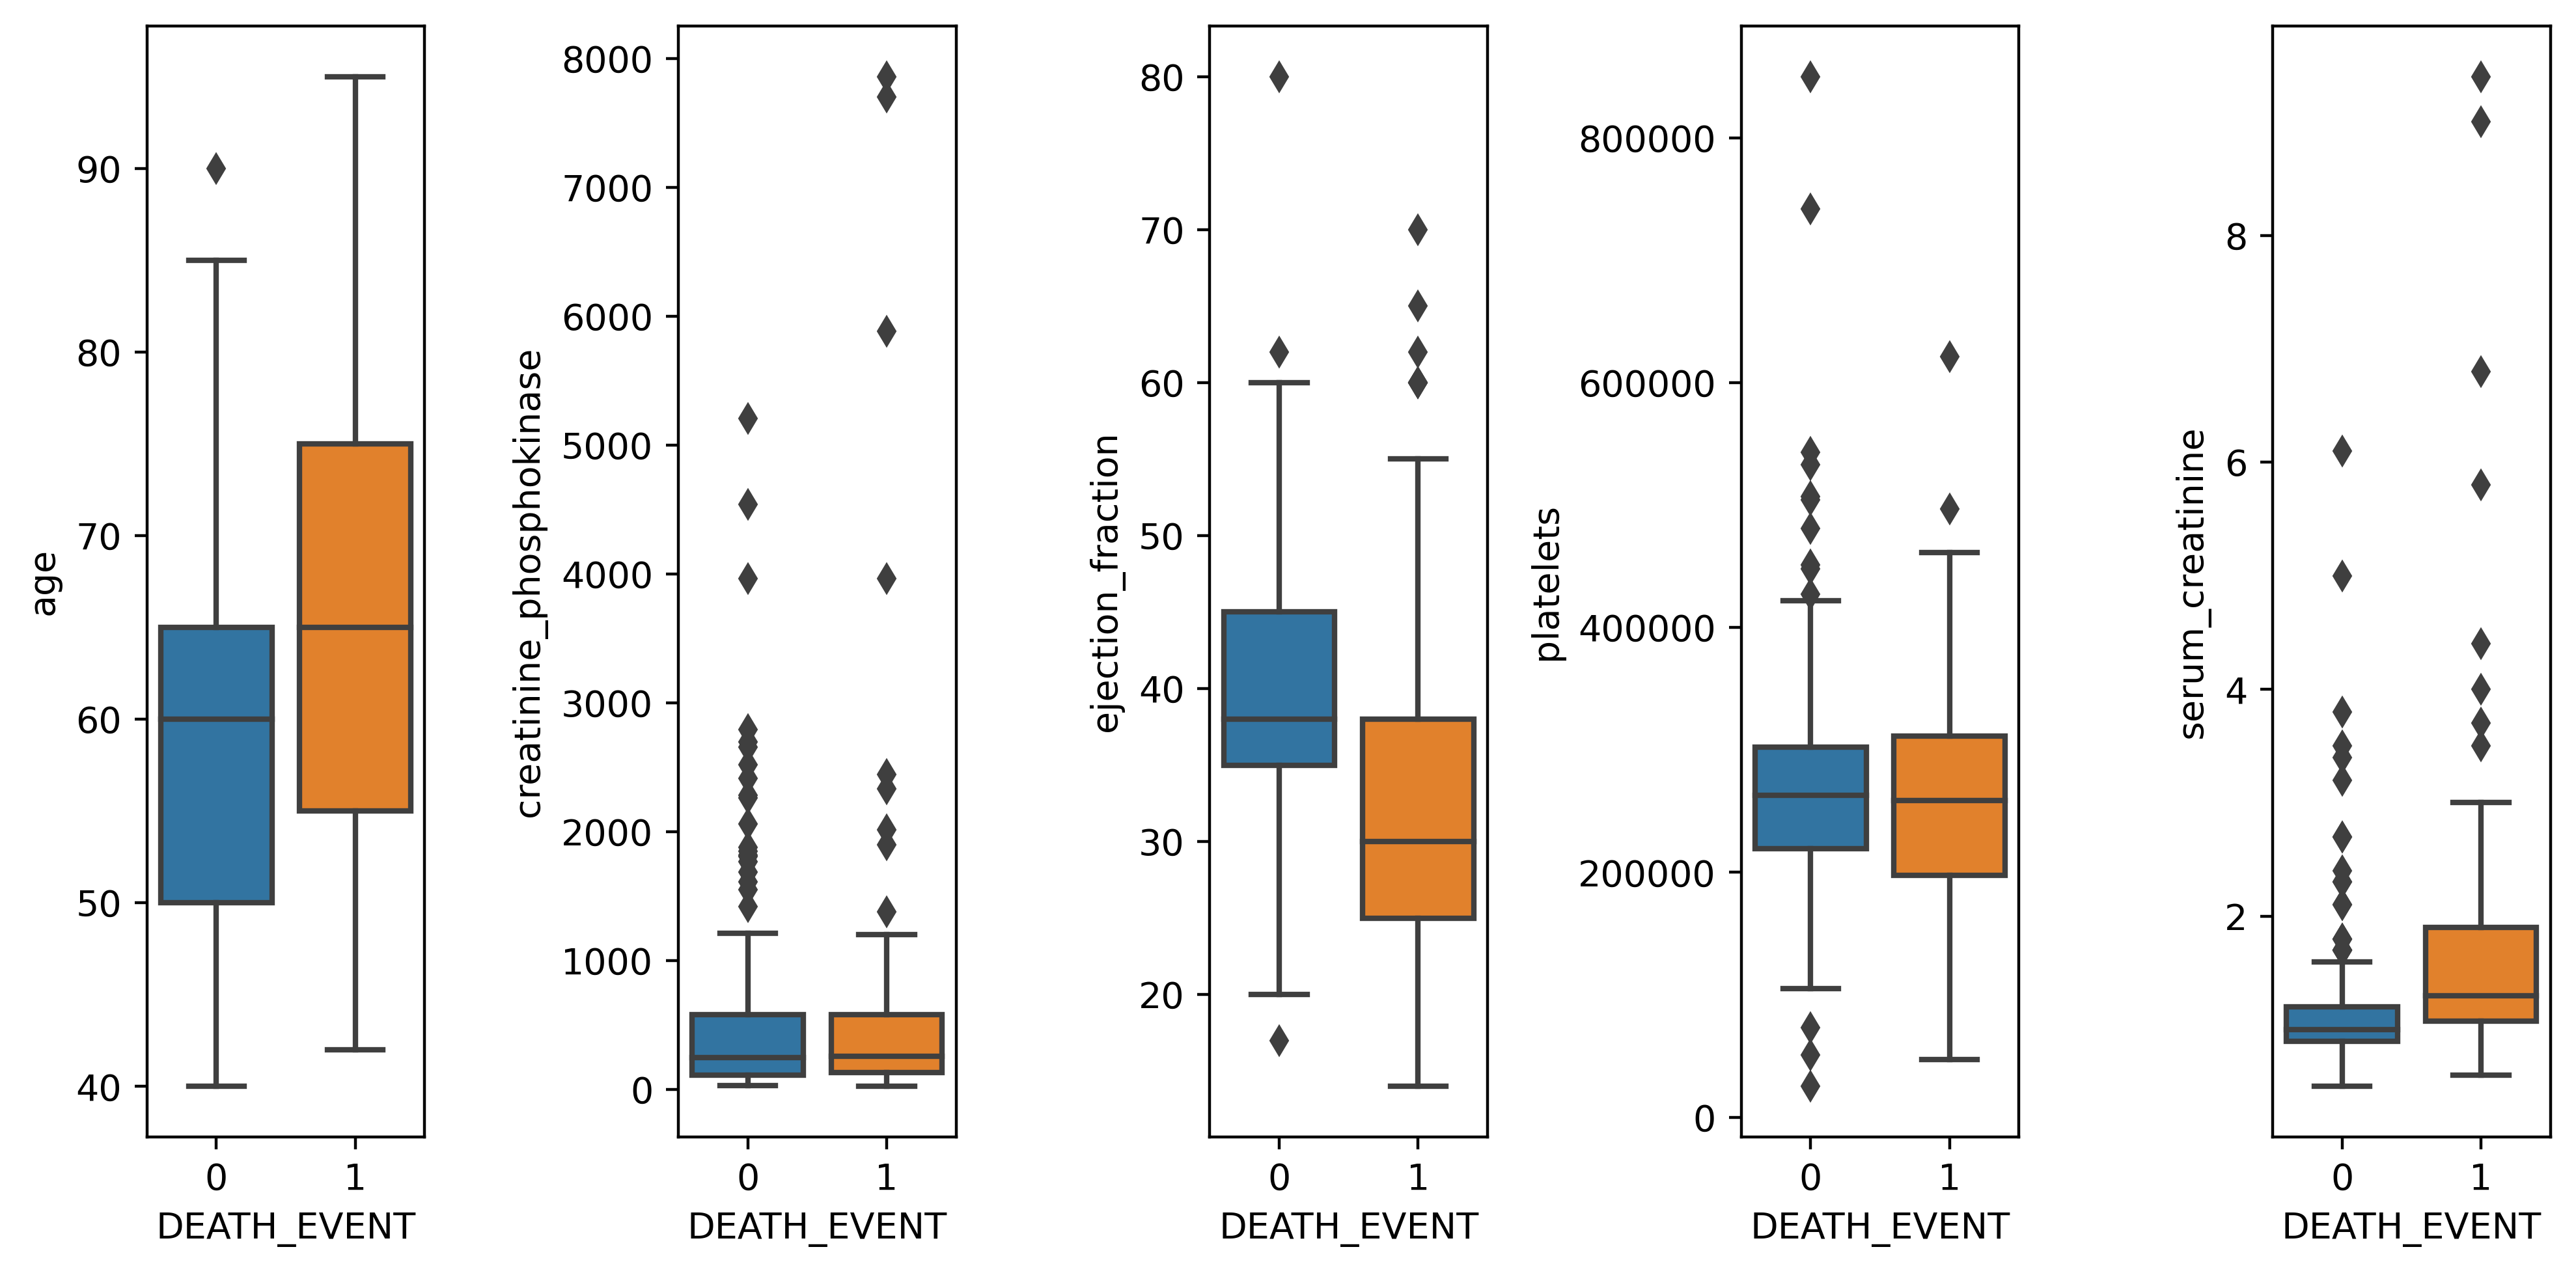

In [26]:
fig, ax = plt.subplots(1,5,figsize=(10,5), dpi=200) # 1행 5열

for axis, num_var in zip(ax, numeric_var) :
  sns.boxplot(y=num_var, data=df, x='DEATH_EVENT', ax=axis)

plt.tight_layout()

데이터 분리하기

In [27]:
# X(시험지), y(정답지) 분리하기
X = df.iloc[:,:-1]
y = df['DEATH_EVENT']

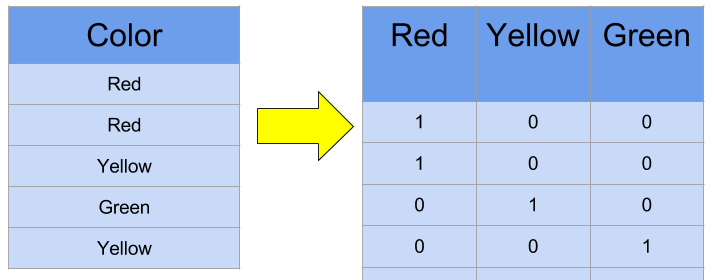

In [ ]:
# 원-핫 인코딩 처리
# 컬럼 -> 원-핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var], drop_first=True)

In [ ]:
# 기존 데이터랑 합치기
X_modified = pd.concat([X,temp], axis=1)

In [ ]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis=1, inplace=True)

In [ ]:
X_modified.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anamia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
1,75,582,20,265000.00,1.9,130,4,0,0,1,1,0
2,55,7861,38,263358.03,1.1,136,6,0,0,0,1,0
3,65,146,20,162000.00,1.3,129,7,0,0,0,1,1
4,50,111,20,210000.00,1.9,137,7,1,0,0,1,0
5,65,160,20,327000.00,2.7,116,8,1,1,0,0,0


훈련용, 테스트 데이터 분리하기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_modified,y,
                                                    train_size=0.7, # test_size
                                                    random_state=7)

차원 축소 -> 스케일링

In [ ]:
# 수치형 데이터 정규화
scaler = StandardScaler()
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_test[numeric_var] = scaler.fit_transform(X_test[numeric_var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
X_train.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anamia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
191,1.548096,-0.045062,-0.302229,0.806502,0.521163,-0.568626,0.574896,0,1,0,1,0
236,1.304090,-0.517003,0.915622,1.353224,-0.318062,0.096539,1.021468,1,0,1,1,0
47,-0.810629,0.751152,-1.114130,0.035234,-0.485907,-1.455513,-1.160354,0,0,1,1,0
274,-1.542647,-0.561902,0.103721,-0.765323,-0.653752,0.761704,1.480799,0,0,0,1,0
221,0.978748,-0.045062,-1.520081,-0.039374,0.294572,-0.568626,0.881117,0,0,0,1,0


머신러닝 모델 구축 -1) LogisticRegression

In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [ ]:
#정확도 확인
print('Train data Score: ' , log_reg.score(X_train,y_train))
print('Test data Score: ' , log_reg.score(X_test,y_test))

Train data Score:  0.8229665071770335
Test data Score:  0.8666666666666667


머신러닝 모델 구축 -2) Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=20,
                              min_samples_split=40).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , tree.score(X_train,y_train))
print('Test data Score: ' , tree.score(X_test,y_test))

Train data Score:  0.8325358851674641
Test data Score:  0.8666666666666667


머신러닝 모델 구축 -3) GradientBoostiongClassifier

In [ ]:
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.05).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , boost.score(X_train,y_train))
print('Test data Score: ' , boost.score(X_test,y_test))

Train data Score:  0.9808612440191388
Test data Score:  0.8777777777777778


머신러닝 모델 구축 -4) KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , KNN.score(X_train,y_train))
print('Test data Score: ' , KNN.score(X_test,y_test))

Train data Score:  0.7894736842105263
Test data Score:  0.8666666666666667


머신러닝 모델 구축 -5) SVM

In [ ]:
svm =svm.SVC(kernel='rbf',probability=True).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , svm.score(X_train,y_train))
print('Test data Score: ' , svm.score(X_test,y_test))

Train data Score:  0.8803827751196173
Test data Score:  0.8777777777777778


머신러닝 모델 구축 -6) LDA

In [ ]:
# 2개의 클래스로 구분하기 위한 LDA 생성
lda = LinearDiscriminantAnalysis(n_components=2).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(12, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
# 정확도 확인
print('Train data Score: ' , lda.score(X_train,y_train))
print('Test data Score: ' , lda.score(X_test,y_test))

Train data Score:  0.8229665071770335
Test data Score:  0.8888888888888888


머신러닝 모델 구축 -7) QDA

In [ ]:
# 기본적인 QDA 구현
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , qda.score(X_train,y_train))
print('Test data Score: ' , qda.score(X_test,y_test))

Train data Score:  0.8086124401913876
Test data Score:  0.8555555555555555


머신러닝 모델 구축-8) RF

In [ ]:
# RF 구현 (10개의 트리)
rf = RandomForestClassifier(n_estimators=10, random_state=7).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , rf.score(X_train,y_train))
print('Test data Score: ' , rf.score(X_test,y_test))

Train data Score:  0.9712918660287081
Test data Score:  0.8666666666666667


머신러닝 모델 구축-9) BAGGING

In [ ]:
# BAGGING 구현 
bag = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=7).fit(X_train, y_train)

In [ ]:
# 정확도 확인
print('Train data Score: ' , bag.score(X_train,y_train))
print('Test data Score: ' , bag.score(X_test,y_test))

Train data Score:  0.8325358851674641
Test data Score:  0.8777777777777778


성능평가 -ROC 커브

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


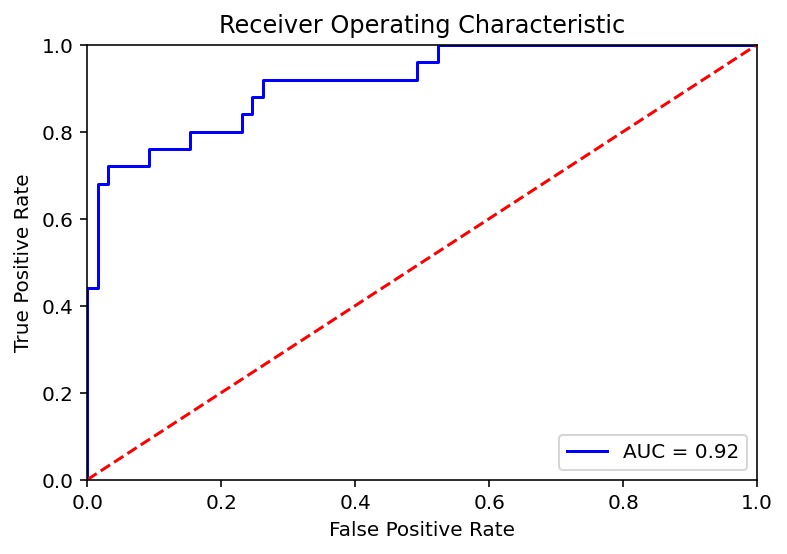

In [ ]:
# Logistic Regression ROC
plot_auc_roc(log_reg)

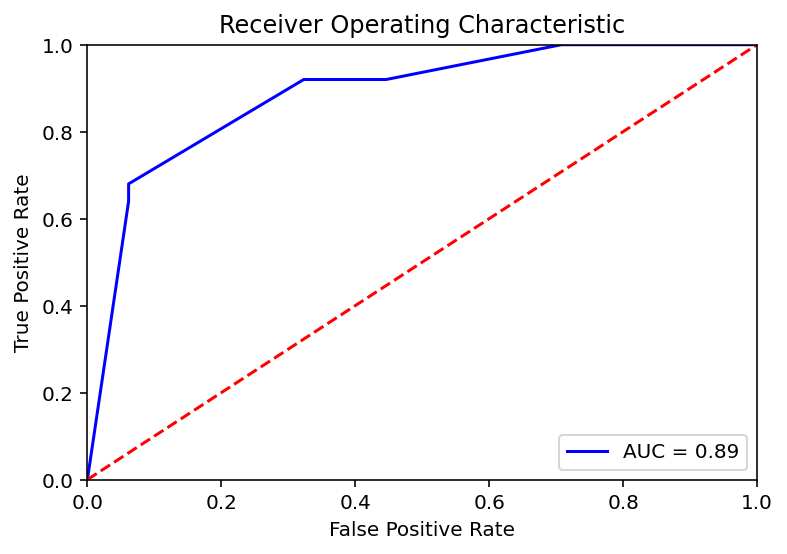

In [ ]:
# Tree
plot_auc_roc(tree)

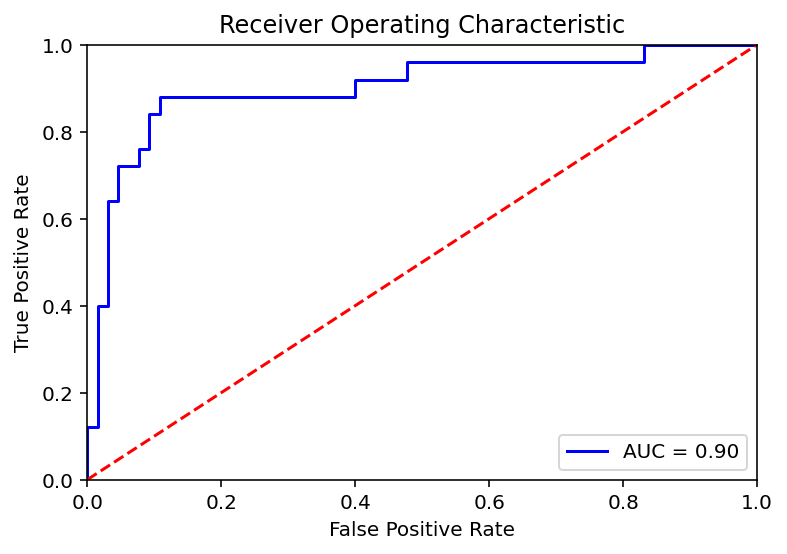

In [ ]:
# GradientBoostingClassifier
plot_auc_roc(boost)

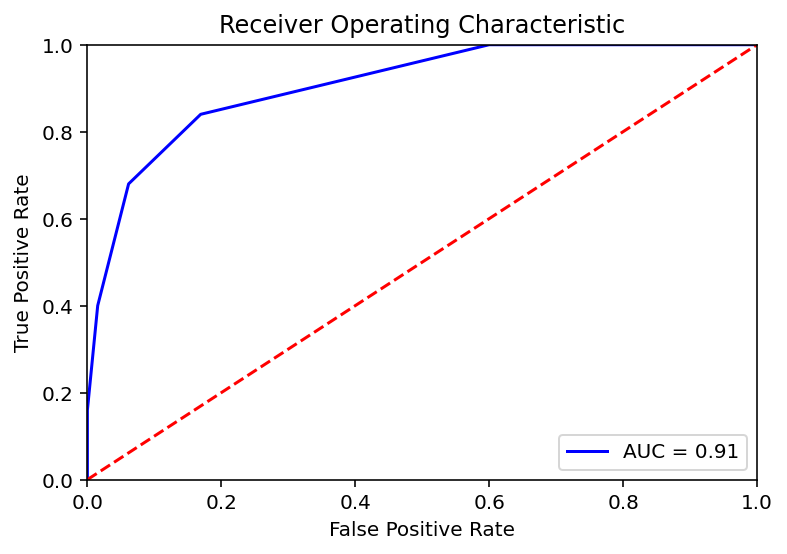

In [ ]:
# KNeighborsClassifier
plot_auc_roc(KNN)

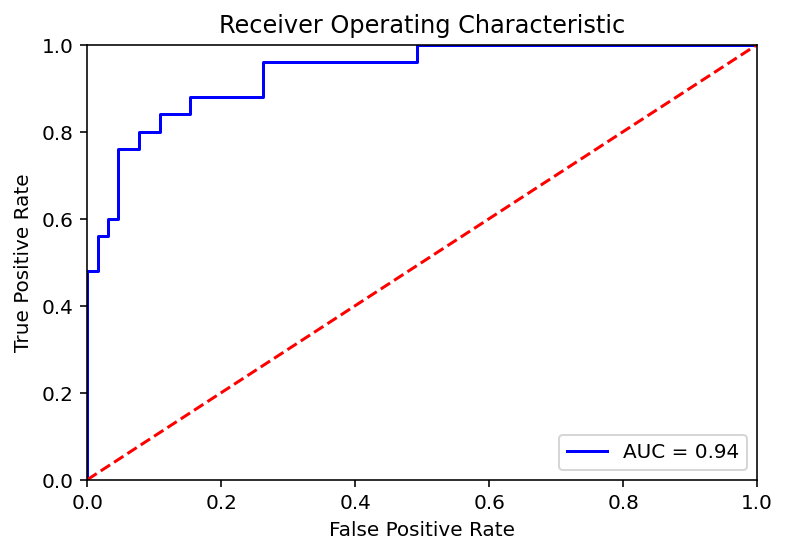

In [ ]:
# Support Vector Machine
plot_auc_roc(svm)

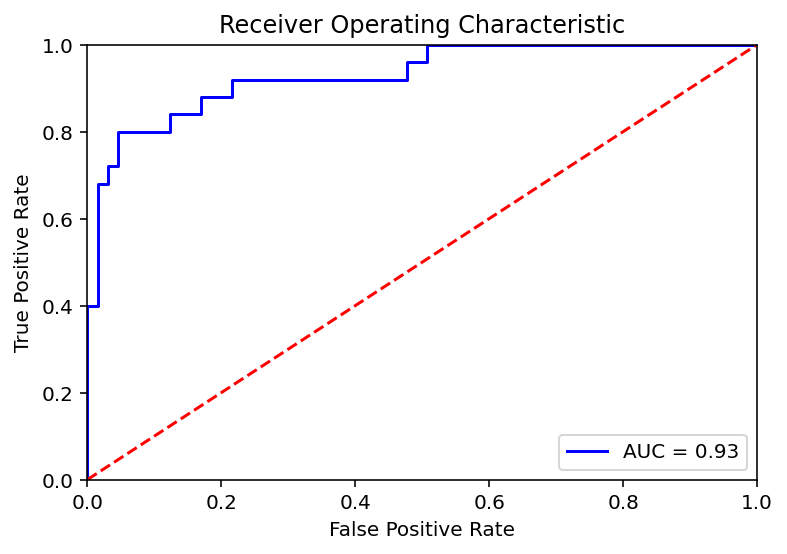

In [ ]:
# Linear Discriminant Analysis
plot_auc_roc(lda)

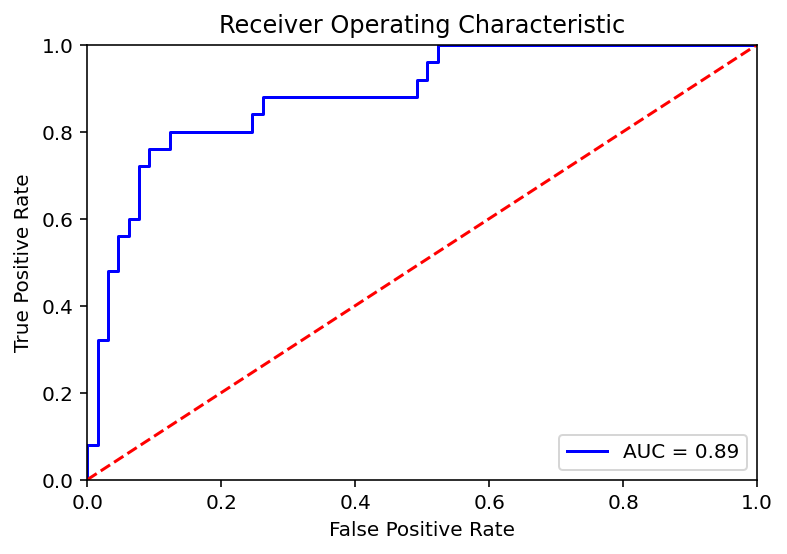

In [ ]:
# Quadratic Discriminant Analysis
plot_auc_roc(qda)

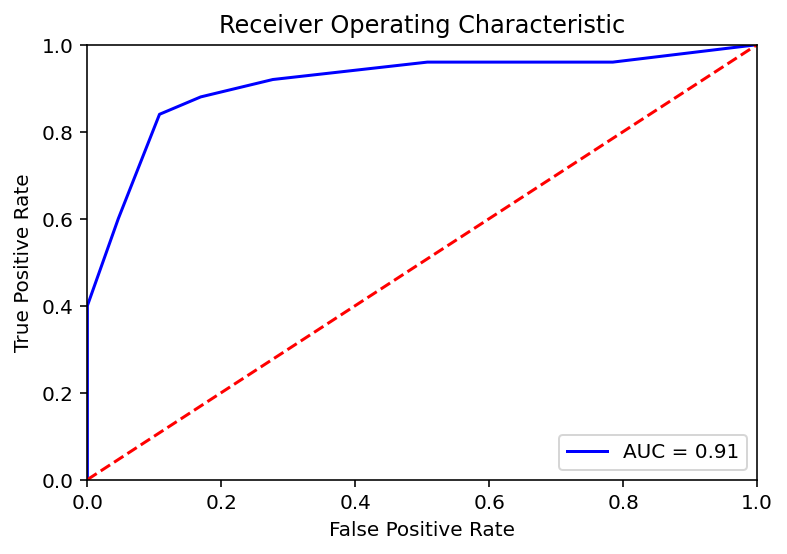

In [ ]:
# RandomForest
plot_auc_roc(rf)

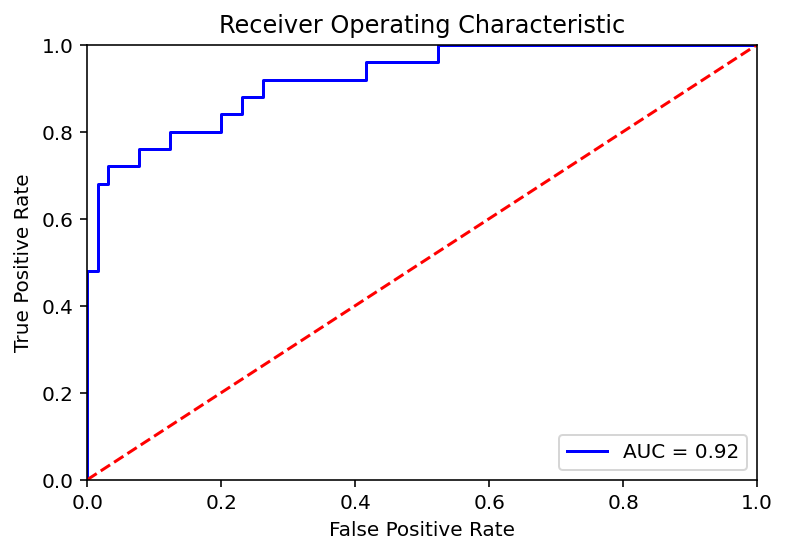

In [ ]:
# Bagging
plot_auc_roc(bag)

모델 성능 평가

In [ ]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)
print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        65
           1       0.78      0.72      0.75        25

    accuracy                           0.87        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.86      0.87      0.86        90

accuracy 0.8666666666666667
precision 0.782608695652174
recall 0.72
f1 0.7499999999999999


In [ ]:
# tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('tree 평가 지표')
print(tree_report)
print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )

tree 평가 지표
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        65
           1       0.81      0.68      0.74        25

    accuracy                           0.87        90
   macro avg       0.85      0.81      0.82        90
weighted avg       0.86      0.87      0.86        90

accuracy 0.8666666666666667
precision 0.8095238095238095
recall 0.68
f1 0.7391304347826089


In [ ]:
# boost 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('boost 평가 지표')
print(boost_report)
print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )

boost 평가 지표
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        65
           1       0.75      0.84      0.79        25

    accuracy                           0.88        90
   macro avg       0.84      0.87      0.85        90
weighted avg       0.88      0.88      0.88        90

accuracy 0.8777777777777778
precision 0.75
recall 0.84
f1 0.7924528301886793


In [ ]:
# KNN 평가 지표
KNN_y_hat = KNN.predict(X_test)
KNN_report = metrics.classification_report(y_test, KNN_y_hat)
print('KNN 평가 지표')
print(KNN_report)
print('accuracy', metrics.accuracy_score(y_test,KNN_y_hat) )
print('precision', metrics.precision_score(y_test,KNN_y_hat) )
print('recall', metrics.recall_score(y_test,KNN_y_hat) )
print('f1', metrics.f1_score(y_test,KNN_y_hat) )

KNN 평가 지표
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        65
           1       0.81      0.68      0.74        25

    accuracy                           0.87        90
   macro avg       0.85      0.81      0.82        90
weighted avg       0.86      0.87      0.86        90

accuracy 0.8666666666666667
precision 0.8095238095238095
recall 0.68
f1 0.7391304347826089


In [ ]:
# SVM 평가 지표
svm_y_hat = svm.predict(X_test)
svm_report = metrics.classification_report(y_test, svm_y_hat)
print('svm 평가 지표')
print(svm_report)
print('accuracy', metrics.accuracy_score(y_test,svm_y_hat) )
print('precision', metrics.precision_score(y_test,svm_y_hat) )
print('recall', metrics.recall_score(y_test,svm_y_hat) )
print('f1', metrics.f1_score(y_test,svm_y_hat) )

svm 평가 지표
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        65
           1       0.79      0.76      0.78        25

    accuracy                           0.88        90
   macro avg       0.85      0.84      0.85        90
weighted avg       0.88      0.88      0.88        90

accuracy 0.8777777777777778
precision 0.7916666666666666
recall 0.76
f1 0.7755102040816326


In [ ]:
# LDA 평가 지표
lda_y_hat = lda.predict(X_test)
lda_report = metrics.classification_report(y_test, lda_y_hat)
print('lda 평가 지표')
print(lda_report)
print('accuracy', metrics.accuracy_score(y_test,lda_y_hat) )
print('precision', metrics.precision_score(y_test,lda_y_hat) )
print('recall', metrics.recall_score(y_test,lda_y_hat) )
print('f1', metrics.f1_score(y_test,lda_y_hat) )

lda 평가 지표
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.80      0.80      0.80        25

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90

accuracy 0.8888888888888888
precision 0.8
recall 0.8
f1 0.8000000000000002


In [ ]:
# QDA 평가 지표
qda_y_hat = qda.predict(X_test)
qda_report = metrics.classification_report(y_test, qda_y_hat)
print('qda 평가 지표')
print(qda_report)
print('accuracy', metrics.accuracy_score(y_test,qda_y_hat) )
print('precision', metrics.precision_score(y_test,qda_y_hat) )
print('recall', metrics.recall_score(y_test,qda_y_hat) )
print('f1', metrics.f1_score(y_test,qda_y_hat) )

qda 평가 지표
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        65
           1       0.77      0.68      0.72        25

    accuracy                           0.86        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.85      0.86      0.85        90

accuracy 0.8555555555555555
precision 0.7727272727272727
recall 0.68
f1 0.7234042553191491


In [ ]:
# RF 평가 지표
rf_y_hat = rf.predict(X_test)
rf_report = metrics.classification_report(y_test, rf_y_hat)
print('rf 평가 지표')
print(rf_report)
print('accuracy', metrics.accuracy_score(y_test,rf_y_hat) )
print('precision', metrics.precision_score(y_test,rf_y_hat) )
print('recall', metrics.recall_score(y_test,rf_y_hat) )
print('f1', metrics.f1_score(y_test,rf_y_hat) )

rf 평가 지표
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        65
           1       0.78      0.72      0.75        25

    accuracy                           0.87        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.86      0.87      0.86        90

accuracy 0.8666666666666667
precision 0.782608695652174
recall 0.72
f1 0.7499999999999999


In [ ]:
# BAG 평가 지표
bag_y_hat = bag.predict(X_test)
bag_report = metrics.classification_report(y_test, bag_y_hat)
print('bag 평가 지표')
print(bag_report)
print('accuracy', metrics.accuracy_score(y_test,bag_y_hat) )
print('precision', metrics.precision_score(y_test,bag_y_hat) )
print('recall', metrics.recall_score(y_test,bag_y_hat) )
print('f1', metrics.f1_score(y_test,bag_y_hat) )

bag 평가 지표
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        65
           1       0.82      0.72      0.77        25

    accuracy                           0.88        90
   macro avg       0.86      0.83      0.84        90
weighted avg       0.88      0.88      0.88        90

accuracy 0.8777777777777778
precision 0.8181818181818182
recall 0.72
f1 0.7659574468085107


In [ ]:
precision_list = []
recall_list = []

precision_list.append(metrics.precision_score(y_test, lg_y_hat))
recall_list.append(metrics.recall_score(y_test, lg_y_hat))

precision_list.append(metrics.precision_score(y_test, tree_y_hat))
recall_list.append(metrics.recall_score(y_test, tree_y_hat))

precision_list.append(metrics.precision_score(y_test, boost_y_hat))
recall_list.append(metrics.recall_score(y_test, boost_y_hat))

precision_list.append(metrics.precision_score(y_test, KNN_y_hat))
recall_list.append(metrics.recall_score(y_test, KNN_y_hat))

precision_list.append(metrics.precision_score(y_test, svm_y_hat))
recall_list.append(metrics.recall_score(y_test, svm_y_hat))

precision_list.append(metrics.precision_score(y_test, lda_y_hat))
recall_list.append(metrics.recall_score(y_test, lda_y_hat))

precision_list.append(metrics.precision_score(y_test, qda_y_hat))
recall_list.append(metrics.recall_score(y_test, qda_y_hat))

precision_list.append(metrics.precision_score(y_test, rf_y_hat))
recall_list.append(metrics.recall_score(y_test, rf_y_hat))

precision_list.append(metrics.precision_score(y_test, bag_y_hat))
recall_list.append(metrics.recall_score(y_test, bag_y_hat))

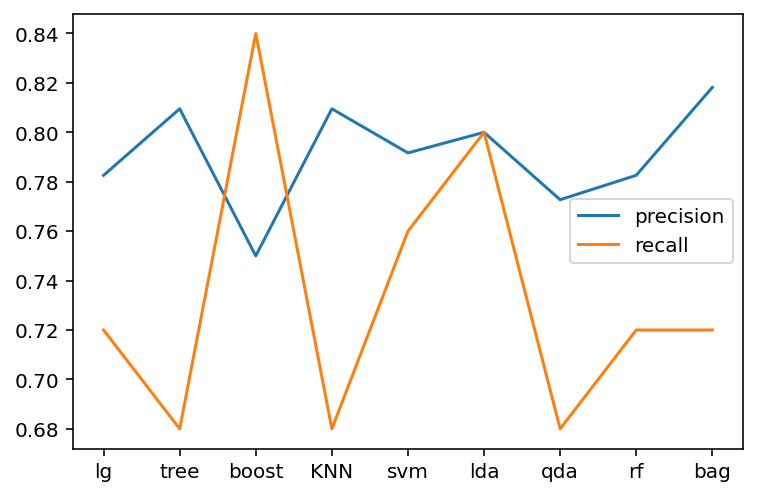

In [ ]:
plt.plot(['lg', 'tree','boost','KNN','svm','lda','qda','rf','bag'], precision_list, label='precision')
plt.plot(['lg', 'tree','boost','KNN','svm','lda','qda','rf','bag'], recall_list, label='recall')
plt.legend()
plt.show()